In [1]:
!pip install "dask[complete]"

In [2]:
!pip install mlxtend

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from pathlib import Path
import os
import dask.dataframe as dd
from mlxtend.frequent_patterns import apriori, association_rules

In [5]:
pd.set_option('display.max_colwidth', None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Load & Preprocess Data**

In [6]:
data_dir = Path('/content/drive/MyDrive/Data_hasking')
ddf = dd.read_parquet(str(data_dir / '*.parquet'))
ddf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CUST_CUSTNO,ACC_BUSINESSTYPE,ACC_ACCNO,ACC_BUSINESSNO,ACC_CURRENCYISO,BUSINESSNO_TRANS,FK_CURRENCY,AMOUNT,AMOUNTORIG,BRANCH_OFFICE,CONTRA_ACCNO,CONTRA_ZIP,CONTRA_NAME,CSHYN,REASON1,REASON2,REASON4,TR_FLAG_01,ANALYTICAL_TRANS_CODE,TR_SP_01,TR_SP_02,TR_SP_03,TR_SP_04,TR_SP_05,TR_SP_10,VALUEDATE
npartitions=184,,,,,,,,,,,,,,,,,,,,,,,,,,
,string,string,string,string,string,string,string,float64,float64,string,string,string,string,string,string,string,string,string,string,string,string,string,string,string,float64,string
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [ ]:
df=ddf.compute()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CUST_CUSTNO,ACC_BUSINESSTYPE,ACC_ACCNO,ACC_BUSINESSNO,ACC_CURRENCYISO,BUSINESSNO_TRANS,FK_CURRENCY,AMOUNT,AMOUNTORIG,BRANCH_OFFICE,...,REASON4,TR_FLAG_01,ANALYTICAL_TRANS_CODE,TR_SP_01,TR_SP_02,TR_SP_03,TR_SP_04,TR_SP_05,TR_SP_10,VALUEDATE
0,3f2eada1d327565f548b4cdb223082ca13d971c2e89a652693fc7b22786faa0d,CARD,d9cf0493edd38a1771bec4e3f0b880fa0a2ef4af4b4e5cfed4dcfa8e7d129ba8,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023100646715817,VND,-188.05,-188.05,110000,...,<NA>,Y,TP501,974027495dbcc2605bbcd3ebae291cac0daa5290b8d4235d2ef3c3ed4f45ea08,POS,HOI SO SHB,CM,<NA>,5459.82,20231006
1,596a4a7e3481d1771849866a15ad2004a721cbe3282d67b1bac0237e5d4c68f2,CARD,52d64cd718f58f7749bff6e900549b0f8d24e9caf26932197e7d52989f367844,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023100646715818,VND,-188.00,-188.00,110000,...,<NA>,Y,TP501,34fc1dfd0606d350e60eeb3a6049aa65db26afdb6939faa0995560cc2f86ebe5,POS,HOI SO SHB,CM,<NA>,5463.39,20231006
2,af87e4cc3440e9f54686e94d3ac4fd76209e654379fe9c5490a5420d8483ee0e,CARD,95088faa7057f8446ea0aac54cf8ca8ceede719c249eff13851941f71e4e3a84,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023100646715819,VND,-26.00,-26.00,110000,...,<NA>,Y,TP501,523f004d4ecd223089749ffc1361f565a2777500f96027a4c0e872befc81cc29,EPOS,HOI SO SHB,CM,<NA>,4144.11,20231006
3,f29238e3974b4847c4624371c59135dea15a79bf4124c2b07436630ee042bb6f,CARD,629f2052caf4e6d703b734f8aa70492c51473fe80820223525d3b9808d2bb7e1,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023100646715820,VND,-150.00,-150.00,110000,...,<NA>,Y,TP501,0f6df0873db12d610ff8f47a7c75c1b7ae78cabe1e0883c1fa6e529a37218cfd,EPOS,HOI SO SHB,CM,<NA>,5838.49,20231006
4,f29238e3974b4847c4624371c59135dea15a79bf4124c2b07436630ee042bb6f,CARD,629f2052caf4e6d703b734f8aa70492c51473fe80820223525d3b9808d2bb7e1,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023100646715821,VND,-65.00,-65.00,110000,...,<NA>,Y,TP501,dd42edadf0bb8d8cbd423836c7d5952564b0fa1d3dc552d556c1cae5cc9d9b76,POS,HOI SO SHB,CM,<NA>,5829.69,20231006


In [ ]:
df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['CUST_CUSTNO', 'ACC_BUSINESSTYPE', 'ACC_ACCNO', 'ACC_BUSINESSNO',
       'ACC_CURRENCYISO', 'BUSINESSNO_TRANS', 'FK_CURRENCY', 'AMOUNT',
       'AMOUNTORIG', 'BRANCH_OFFICE', 'CONTRA_ACCNO', 'CONTRA_ZIP',
       'CONTRA_NAME', 'CSHYN', 'REASON1', 'REASON2', 'REASON4', 'TR_FLAG_01',
       'ANALYTICAL_TRANS_CODE', 'TR_SP_01', 'TR_SP_02', 'TR_SP_03', 'TR_SP_04',
       'TR_SP_05', 'TR_SP_10', 'VALUEDATE'],
      dtype='object')

**data portion of a single day**

In [ ]:
# prompt: take the data portion of single day using VALUEDATE

df_single_day = df[df['VALUEDATE'] == df['VALUEDATE'].unique()[0]]


In [ ]:
df_single_day.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CUST_CUSTNO,ACC_BUSINESSTYPE,ACC_ACCNO,ACC_BUSINESSNO,ACC_CURRENCYISO,BUSINESSNO_TRANS,FK_CURRENCY,AMOUNT,AMOUNTORIG,BRANCH_OFFICE,...,REASON4,TR_FLAG_01,ANALYTICAL_TRANS_CODE,TR_SP_01,TR_SP_02,TR_SP_03,TR_SP_04,TR_SP_05,TR_SP_10,VALUEDATE
0,3f2eada1d327565f548b4cdb223082ca13d971c2e89a652693fc7b22786faa0d,CARD,d9cf0493edd38a1771bec4e3f0b880fa0a2ef4af4b4e5cfed4dcfa8e7d129ba8,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023100646715817,VND,-188.05,-188.05,110000,...,<NA>,Y,TP501,974027495dbcc2605bbcd3ebae291cac0daa5290b8d4235d2ef3c3ed4f45ea08,POS,HOI SO SHB,CM,<NA>,5459.82,20231006
1,596a4a7e3481d1771849866a15ad2004a721cbe3282d67b1bac0237e5d4c68f2,CARD,52d64cd718f58f7749bff6e900549b0f8d24e9caf26932197e7d52989f367844,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023100646715818,VND,-188.00,-188.00,110000,...,<NA>,Y,TP501,34fc1dfd0606d350e60eeb3a6049aa65db26afdb6939faa0995560cc2f86ebe5,POS,HOI SO SHB,CM,<NA>,5463.39,20231006
2,af87e4cc3440e9f54686e94d3ac4fd76209e654379fe9c5490a5420d8483ee0e,CARD,95088faa7057f8446ea0aac54cf8ca8ceede719c249eff13851941f71e4e3a84,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023100646715819,VND,-26.00,-26.00,110000,...,<NA>,Y,TP501,523f004d4ecd223089749ffc1361f565a2777500f96027a4c0e872befc81cc29,EPOS,HOI SO SHB,CM,<NA>,4144.11,20231006
3,f29238e3974b4847c4624371c59135dea15a79bf4124c2b07436630ee042bb6f,CARD,629f2052caf4e6d703b734f8aa70492c51473fe80820223525d3b9808d2bb7e1,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023100646715820,VND,-150.00,-150.00,110000,...,<NA>,Y,TP501,0f6df0873db12d610ff8f47a7c75c1b7ae78cabe1e0883c1fa6e529a37218cfd,EPOS,HOI SO SHB,CM,<NA>,5838.49,20231006
4,f29238e3974b4847c4624371c59135dea15a79bf4124c2b07436630ee042bb6f,CARD,629f2052caf4e6d703b734f8aa70492c51473fe80820223525d3b9808d2bb7e1,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023100646715821,VND,-65.00,-65.00,110000,...,<NA>,Y,TP501,dd42edadf0bb8d8cbd423836c7d5952564b0fa1d3dc552d556c1cae5cc9d9b76,POS,HOI SO SHB,CM,<NA>,5829.69,20231006


In [ ]:
df_single_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783325 entries, 0 to 783324
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CUST_CUSTNO            783325 non-null  string 
 1   ACC_BUSINESSTYPE       782139 non-null  string 
 2   ACC_ACCNO              783325 non-null  string 
 3   ACC_BUSINESSNO         783325 non-null  string 
 4   ACC_CURRENCYISO        782139 non-null  string 
 5   BUSINESSNO_TRANS       783325 non-null  string 
 6   FK_CURRENCY            783325 non-null  string 
 7   AMOUNT                 783325 non-null  float64
 8   AMOUNTORIG             783325 non-null  float64
 9   BRANCH_OFFICE          783325 non-null  string 
 10  CONTRA_ACCNO           783325 non-null  string 
 11  CONTRA_ZIP             68425 non-null   string 
 12  CONTRA_NAME            68442 non-null   string 
 13  CSHYN                  783325 non-null  string 
 14  REASON1                779117 non-nu

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_single_day.describe(include='string')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,CUST_CUSTNO,ACC_BUSINESSTYPE,ACC_ACCNO,ACC_BUSINESSNO,ACC_CURRENCYISO,BUSINESSNO_TRANS,FK_CURRENCY,BRANCH_OFFICE,CONTRA_ACCNO,CONTRA_ZIP,...,REASON2,REASON4,TR_FLAG_01,ANALYTICAL_TRANS_CODE,TR_SP_01,TR_SP_02,TR_SP_03,TR_SP_04,TR_SP_05,VALUEDATE
count,783325,782139,783325,783325,782139,783325,783325,783325,783325,68425,...,595500,158154,783325,783325,783325,783325,783325,783325,68442,783325
unique,165738,6,182313,2033,8,783325,8,281,37582,20,...,220467,37057,2,64,702653,19,281,22,24500,1
top,7b743982a30f2f716c18960f622094f0017083368e07e5959da9ca0354a76af2,CASA,d721c2031c0a2bb9edf74c4e9fbc6955586007287743257509afe7b4f9ec4ca1,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,VND,2023100646715817,VND,110000,0553d33b8bbc8e3a944ff438a51a17cfb38fd0241667af98b6834685cc487ee6,SHBAVNVX,...,XXX,t noi dai lau cua GoXX tele,N,1|1,5bd687b6fe4c56308e399ff14bc90614a54d794aaa6102d6f3686aec043f80b1,MOB,HOI SO SHB,FP,CITAD SHB,20231006
freq,17379,749074,11870,780510,781368,1,782518,721879,714916,65356,...,14658,16228,472060,364730,9,393446,721879,639664,3873,783325


**Handle Missing Values**

In [ ]:
# Check for missing values
missing_values = df_single_day.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Drop columns with a high percentage of missing values (e.g., more than 50%)
threshold = len(df_single_day) * 0.5
df_single_day = df_single_day.dropna(thresh=threshold, axis=1)

# For the remaining columns, fill missing values with appropriate strategies
# For numeric columns, fill with the median
numeric_cols = df_single_day.select_dtypes(include=['number']).columns
df_single_day[numeric_cols] = df_single_day[numeric_cols].fillna(df_single_day[numeric_cols].median())

# For string columns, fill with the mode
string_cols = df_single_day.select_dtypes(include=['string']).columns
df_single_day[string_cols] = df_single_day[string_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no missing values left
print("Missing values after cleaning:")
print(df_single_day.isnull().sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-f45f6c948798>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_day[numeric_cols] = df_single_day[numeric_cols].fillna(df_single_day[numeric_cols].median())


Missing values per column:
CUST_CUSTNO                   0
ACC_BUSINESSTYPE           1186
ACC_ACCNO                     0
ACC_BUSINESSNO                0
ACC_CURRENCYISO            1186
BUSINESSNO_TRANS              0
FK_CURRENCY                   0
AMOUNT                        0
AMOUNTORIG                    0
BRANCH_OFFICE                 0
CONTRA_ACCNO                  0
CONTRA_ZIP               714900
CONTRA_NAME              714883
CSHYN                         0
REASON1                    4208
REASON2                  187825
REASON4                  625171
TR_FLAG_01                    0
ANALYTICAL_TRANS_CODE         0
TR_SP_01                      0
TR_SP_02                      0
TR_SP_03                      0
TR_SP_04                      0
TR_SP_05                 714883
TR_SP_10                 782675
VALUEDATE                     0
dtype: int64
Missing values after cleaning:
CUST_CUSTNO              0
ACC_BUSINESSTYPE         0
ACC_ACCNO                0
ACC_BUSINESSNO  

<ipython-input-18-f45f6c948798>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_single_day[string_cols] = df_single_day[string_cols].apply(lambda x: x.fillna(x.mode()[0]))


**Encode Categorical Variables**

In [ ]:
# Use One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df_single_day, columns=string_cols, drop_first=True)

# Verify the changes
print("Data after One-Hot Encoding:")
print(df_encoded.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#  prepare the data after one hot encoding to make apriori algorithm

# Convert the DataFrame to a transaction DataFrame
transaction_df = df_encoded.astype(bool)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
transaction_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,AMOUNT,AMOUNTORIG,CUST_CUSTNO_00013c38ac340d54e458cc923fbfed7171c5586877fd60657a0f12f13f25cfc9,CUST_CUSTNO_0004ac8e5f25036c2d9fad2f488eaaf3393e074874ab0943a78a47f5397a137e,CUST_CUSTNO_0005eed60a31cd54ca3d4c708c38a5927b396d43b23728ef15fb9bfb8314a85b,CUST_CUSTNO_000975b0ee367856502b174994023821120d5730b3fcd384eda36753a7e1e2c7,CUST_CUSTNO_000b52ed86b099794098a74525d71bbc0b217513f8991f6783f127e30d6d33d0,CUST_CUSTNO_000f99e1d656961a9b6c86837647f0b7aae4a67b2e321d8a39bd6d7a4122b5ef,CUST_CUSTNO_00118b4c765aa2d5e5e232f2c2e1ee33edfea8ba064b3f2915242ac4faef9bca,CUST_CUSTNO_00147ae996e8d4198e3933c1f77076502ba8d79574ae2a328e91f1a20617bda3,...,TR_SP_05_Y SINH EBAN,TR_SP_05_Y THAI,TR_SP_05_Y TIN,TR_SP_05_Y TRI,TR_SP_05_Y TU MLO,TR_SP_05_YANCHENKO ANTON,TR_SP_05_YIN SHIPING,TR_SP_05_YROL EBAN,TR_SP_05_cong ty TNHH DAU TU XAY DUNG PHU HOANG MINH,TR_SP_05_cong ty TNHH TK ELEVATOR Viet nam
709,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
894,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
902,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
904,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
907,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633130,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
633131,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
633137,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
633145,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Generate frequent itemsets

frequent_itemsets = apriori(transaction_df, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print(frequent_itemsets.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


    support  \
0  0.998788   
1  0.998788   
2  0.060211   
3  0.060211   
4  0.998034   

                                                                         itemsets  
0                                                                        (AMOUNT)  
1                                                                    (AMOUNTORIG)  
2  (CUST_CUSTNO_6d681af72190882763ad5115560d38bb219881aa0c68f6915bf54bc9a3d6c254)  
3    (ACC_ACCNO_c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e569df5fc17bc0d01d1)  
4                                                           (ACC_CURRENCYISO_VND)  


In [ ]:
## Generate association rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the association rules
print(rules.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                                                      antecedents  \
0                                                                        (AMOUNT)   
1                                                                    (AMOUNTORIG)   
2  (CUST_CUSTNO_6d681af72190882763ad5115560d38bb219881aa0c68f6915bf54bc9a3d6c254)   
3                                                                        (AMOUNT)   
4                                                                        (AMOUNT)   

                                                                      consequents  \
0                                                                    (AMOUNTORIG)   
1                                                                        (AMOUNT)   
2                                                                        (AMOUNT)   
3  (CUST_CUSTNO_6d681af72190882763ad5115560d38bb219881aa0c68f6915bf54bc9a3d6c254)   
4    (ACC_ACCNO_c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e56

In [ ]:
# Example: Focus on rules involving 'ACC_BUSINESSTYPE' or 'CUST_CUSTNO'
filtered_rules = rules[rules['consequents'].apply(lambda x: any('ACC_BUSINESSTYPE' in item or 'CUST_CUSTNO' in item for item in x))]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Display the filtered rules
print("Filtered Association Rules:")
print(filtered_rules)

Filtered Association Rules:
                                                                            antecedents  \
3                                                                              (AMOUNT)   
37                                                                         (AMOUNTORIG)   
71         (ACC_ACCNO_c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e569df5fc17bc0d01d1)   
73                                                                (ACC_CURRENCYISO_VND)   
75                                                                    (FK_CURRENCY_VND)   
...                                                                                 ...   
777294  (CONTRA_ACCNO_c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e569df5fc17bc0d01d1)   
777296                                                            (ACC_CURRENCYISO_VND)   
777297                                                                    (TR_SP_04_LP)   
777298                                                        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#  save the csv file

filtered_rules.to_csv('/content/drive/MyDrive/filtered_association_rules.csv', index=False)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Sort rules by lift
sorted_rules = filtered_rules.sort_values(by='lift', ascending=False)

# Display the top 10 rules with the highest lift
print("Top 10 Rules by Lift:")
print(sorted_rules)

Top 10 Rules by Lift:
                                                                                                                                                                                         antecedents  \
777211                                                                     (CONTRA_ZIP_XXXXXXXX, TR_SP_03_HOI SO SHB, CONTRA_ACCNO_c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e569df5fc17bc0d01d1)   
688080  (ACC_CURRENCYISO_VND, AMOUNTORIG, CONTRA_ACCNO_c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e569df5fc17bc0d01d1, ACC_ACCNO_c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e569df5fc17bc0d01d1)   
688058                                                     (ACC_ACCNO_c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e569df5fc17bc0d01d1, TR_SP_03_HOI SO SHB, AMOUNTORIG, ANALYTICAL_TRANS_CODE_8|48)   
688082  (TR_SP_03_HOI SO SHB, AMOUNTORIG, CONTRA_ACCNO_c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e569df5fc17bc0d01d1, ACC_ACCNO_c0e32d3f49bd04e1ab6328a6ab6769755eb281a232b56e5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


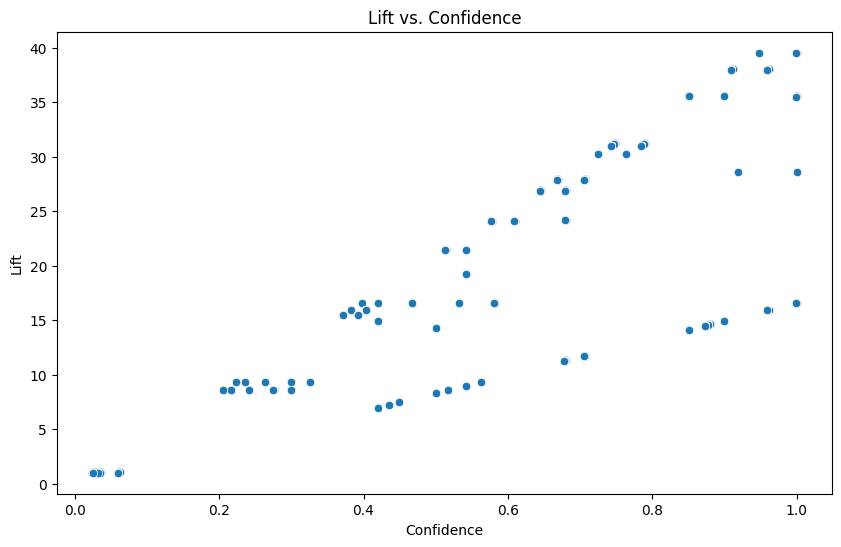

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Lift vs. Confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='confidence', y='lift', data=sorted_rules)
plt.title('Lift vs. Confidence')
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-38-a75e6575bfe4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_rules['rule'] = top_10_rules['antecedents'].astype(str) + ' -> ' + top_10_rules['consequents'].astype(str)


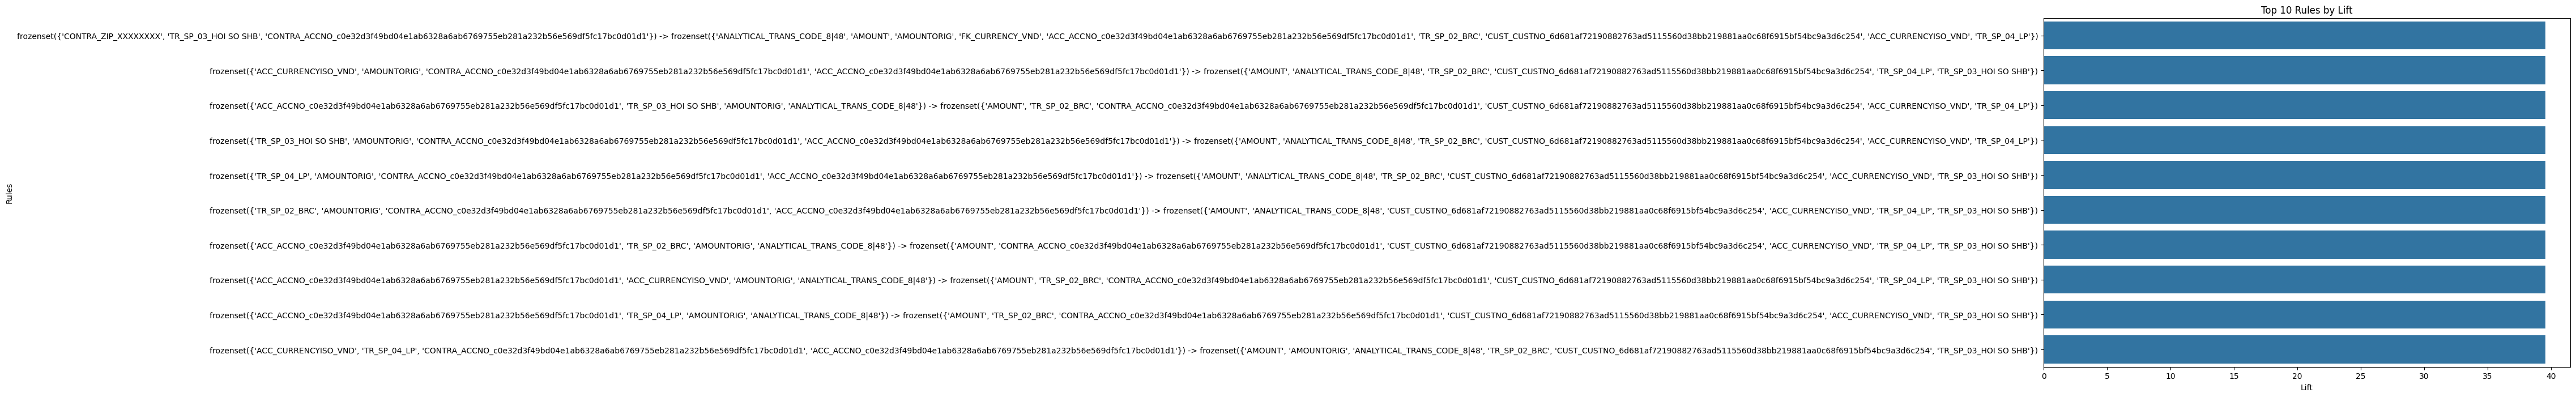

In [ ]:
# Bar plot of the top 10 rules by lift
top_10_rules = sorted_rules.head(10)
top_10_rules['rule'] = top_10_rules['antecedents'].astype(str) + ' -> ' + top_10_rules['consequents'].astype(str)

plt.figure(figsize=(12, 8))
sns.barplot(x='lift', y='rule', data=top_10_rules)
plt.title('Top 10 Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.show()


#Example of Interpreting a Rule:
Consider a rule like:

Antecedents: (AMOUNT)
Consequents: (CUST_CUSTNO_6d681af72190882763ad5115560d38bb219881aa0c68f6915bf54bc9a3d6c254)
Lift: 16.608163
This rule suggests that when the AMOUNT feature is present, it significantly increases the likelihood of the customer number 6d681af7... being involved in the transaction, as indicated by the high lift value.

In [ ]:

# Calculate the probability of each itemset
itemset_probabilities = (
    transaction_df.sum(axis=0) / len(transaction_df)
)

# Calculate the probability of each rule's antecedents and consequents
antecedent_probabilities = (
    filtered_rules["antecedents"].apply(lambda x: itemset_probabilities[x].prod())
)
consequent_probabilities = (
    filtered_rules["consequents"].apply(lambda x: itemset_probabilities[x].prod())
)

# Add these probabilities to the filtered_rules DataFrame
filtered_rules["antecedent_probability"] = antecedent_probabilities
filtered_rules["consequent_probability"] = consequent_probabilities

# Display the updated DataFrame
print(filtered_rules.head())


In [ ]:
#  Detailed Rule Analysis

# Calculate the conviction metric for each rule
filtered_rules["conviction"] = (
    (1 - consequent_probabilities) / (1 - filtered_rules["confidence"])
)

# Display the top 10 rules by conviction
top_10_rules_by_conviction = filtered_rules.sort_values(by="conviction", ascending=False).head(10)

print("Top 10 Rules by Conviction:")
print(top_10_rules_by_conviction)

**The conviction metric** for an association rule measures the degree of implication (i.e., how much more often the antecedent occurs without the consequent than we would expect if the antecedent and consequent were independent). A higher conviction value indicates a stronger implication.